In [1]:
from bufkit import ingest, sounding

In [2]:
file = ingest('KFLG', 'GFS')

Downlading data from http://www.meteo.psu.edu/bufkit/data/GFS/gfs3_kflg.buf


In [3]:
df = sounding(file.data).df
df.head()

,STID,STNM,TIME,SLAT,SLON,SELV,STIM,SHOW,LIFT,SWET,...,LCLP,PWAT,TOTL,CAPE,LCLT,CINS,EQLV,LFCT,BRCH,PROFILE
0,KFLG,723755,2021-09-13 18:00:00,35.13,-111.67,2137.0,0.0,NaN,4.72,NaN,...,564.78,10.18,NaN,0.0,269.95,0.0,NaN,NaN,0.0,PRES TMPC TMWC DWPC THTE ...
1,KFLG,723755,2021-09-13 19:00:00,35.13,-111.67,2137.0,1.0,NaN,4.87,NaN,...,558.19,10.15,NaN,0.0,269.44,0.0,NaN,NaN,0.0,PRES TMPC TMWC DWPC THTE ...
2,KFLG,723755,2021-09-13 20:00:00,35.13,-111.67,2137.0,2.0,NaN,4.51,NaN,...,558.76,10.46,NaN,0.0,269.83,0.0,NaN,NaN,0.0,PRES TMPC TMWC DWPC THTE ...
3,KFLG,723755,2021-09-13 21:00:00,35.13,-111.67,2137.0,3.0,NaN,3.69,NaN,...,561.62,11.52,NaN,0.0,270.55,0.0,NaN,NaN,0.0,PRES TMPC TMWC DWPC THTE ...
4,KFLG,723755,2021-09-13 22:00:00,35.13,-111.67,2137.0,4.0,NaN,3.15,NaN,...,561.59,12.64,NaN,0.0,270.88,0.0,NaN,NaN,0.0,PRES TMPC TMWC DWPC THTE ...


In [4]:
station, time = df.STID[0], df.TIME[0]
profile = df.PROFILE[0]
profile.head()

,PRES,TMPC,TMWC,DWPC,THTE,DRCT,SKNT,OMEG,HGHT
0,779.7,22.84,10.67,1.22,335.36,235.98,9.38,-0.11,2138.12
1,775.8,21.94,10.21,0.91,334.53,237.89,11.70,-0.14,2181.64
2,771.3,21.24,9.85,0.73,334.16,237.80,12.40,-0.18,2231.99
3,766.3,20.54,9.49,0.56,333.89,239.18,12.90,-0.22,2288.15
4,760.7,19.84,9.13,0.40,333.73,239.62,13.07,-0.27,2351.33


In [5]:
import numpy as np
import metpy.calc as mpcalc
import matplotlib.pyplot as plt
from metpy.plots import SkewT
from metpy.units import units

In [6]:
# Get data values and apply units
z = profile.HGHT.values * units.meters
p = profile.PRES.values * units.hPa
T = profile.TMPC.values * units.degC
Tw = profile.TMWC.values * units.degC
Td = profile.DWPC.values * units.degC
wind_dir = profile.DRCT.values * units.degrees
wind_speed = profile.SKNT.values * units.knots
u, v = mpcalc.wind_components(wind_speed, wind_dir)

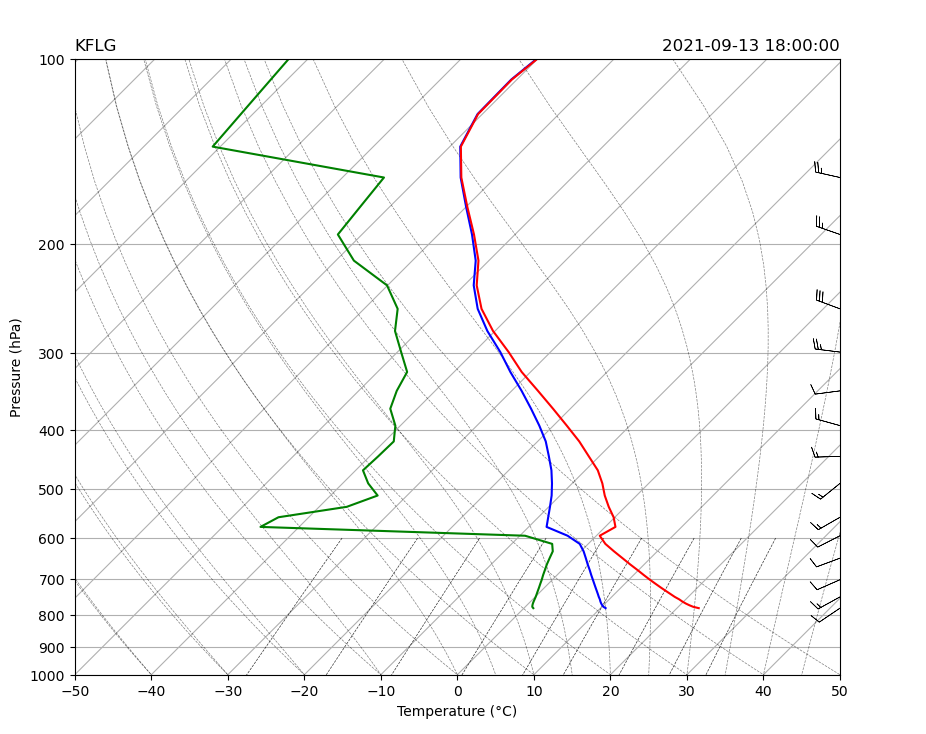

In [7]:
# Setup skew T plot
fig = plt.figure(figsize=(12, 8))
skew = SkewT(fig, rotation=45)

# Plot temperature, wet-bulb, and dewpoint
skew.plot(p, Tw, 'b', linewidth=1.5)
skew.plot(p, Td, 'g', linewidth=1.5)
skew.plot(p, T, 'r', linewidth=1.5)

# Plot wind barb every 50 mb from 1000 to 150 mb
interval = np.arange(150, 1000, 50) * units('hPa')
ix = mpcalc.resample_nn_1d(p, interval)
skew.plot_barbs(p[ix], u[ix], v[ix], length=6, linewidth=0.5)

# Add dry and moist adiabats, as well as mixing ratio
skew.plot_dry_adiabats(color='k', linewidth=0.5)
skew.plot_moist_adiabats(color='k', linewidth=0.5)
skew.plot_mixing_lines(color='k', linewidth=0.5)

# Set axis range
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-50, 50)

# Label axis
skew.ax.set_xlabel('Temperature (°C)')
skew.ax.set_ylabel('Pressure (hPa)')

# Set plot headers
skew.ax.set_title(station, loc='left')
skew.ax.set_title(time, loc='right')

# Show the plot
plt.show()